In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import fsolve
import sympy as sym
from sympy.printing import latex

In [4]:
#some constant
charge_e=1.60217663e-19
k_B=1.380649e-23
R=75.5
area_1=0.196**2 #cm
area_2=0.128**2 #cm
area_3=0.11**2
area_4=0.097**2
area_5=0.2**2
Temp=19+273.15
a=charge_e/(k_B*Temp)
print("theoretical a: ", a)


#some function
#linear
def log_I_s_func(v,log_I_s): return log_I_s + a * v

#direct
def I_func(v,I_s): return I_s*np.exp(a*v)-I_s
def I_func_relax(v,I_s,v_0): return I_s*np.exp(a*(v+v_0))-I_s
def I_relax_not_fix_a(v,I_s,v_0,a0): return I_s*np.exp(a0*(v-v_0))-I_s
def I_relax_with_eta(v,I_s,eta): return I_s*np.exp(a*(1-eta)*v)-I_s

#barrier height phi_B
def phi_B(log_I_s, area, T): return -1*k_B*T/charge_e*(log_I_s-np.log(area*R*T**2))

#(-log_I_s+np.log(area*R*T**2))*1/a

theoretical a:  39.72109564462844


Data for first trail



In [6]:
#get data from csv file

data=np.loadtxt('3.7wafera1st_test.csv', delimiter=",",skiprows=1)
V_exp_1=data.T[0]
I_exp_1=data.T[1]


In [7]:
#taking log to data
log_I_exp_1=np.log(I_exp_1)

#fit data to the equation
#linear approach
fit_result_1=opt.curve_fit(log_I_s_func,V_exp_1,log_I_exp_1)

#direct approach
fit_result_1_1=opt.curve_fit(I_func,V_exp_1,I_exp_1)

#direct fit with relax
fit_result_1_relax=opt.curve_fit(I_func_relax,V_exp_1,I_exp_1,p0=[3e-11,8.95e-2],maxfev = 100000)

#direct fit with relax and non fixed a
fit_result_1_relax_no_fix_a=opt.curve_fit(I_relax_not_fix_a,V_exp_1,I_exp_1,p0=[3e-11,9e-2,45],maxfev = 100000)
#fit_result_1_relax=opt.curve_fit(I_func_relax,V_exp_1,I_exp_1,[3e-7,0.3],bounds=[[0,0.3],[1,0.31]],maxfev = 10000)

#direct fit with relax and eta
fit_result_1_eta=opt.curve_fit(I_relax_with_eta, V_exp_1,I_exp_1) #p0=[3e-11,1e-7]



#result of linear fitting
print("linear fit (log I_s): ",fit_result_1[0]) 
log_I_s_fit_1=fit_result_1[0][0]
I_s=np.exp(log_I_s_fit_1)
print("linear fit (I_s): ",I_s)

#result of direct fitting
print("direct fit: ", fit_result_1_1[0])
I_s_fit_1=fit_result_1_1[0][0]

#result of direct fitting with relax
print("relax fit: ", fit_result_1_relax[0])
I_s_fit_relax=fit_result_1_relax[0][0]
v_0_fitted=fit_result_1_relax[0][1]

#result of direct fitting with relax and non fixed a
print("relax fit no fix a: ", fit_result_1_relax_no_fix_a[0])
i_relax_a= fit_result_1_relax_no_fix_a[0][0]
v0_a= fit_result_1_relax_no_fix_a[0][1]
a0_relax= fit_result_1_relax_no_fix_a[0][2]

#temperature calculation for non fixed a
T_test=charge_e/(k_B*a0_relax)
print("temp: ",T_test-273.15)

#result of direct fit with relax and eta
print("relax fit with eta: ", fit_result_1_eta[0])
I_s_fit_1_eta=fit_result_1_eta[0][0]
eta_1=fit_result_1_eta[0][1]



linear fit (log I_s):  [-24.22645006]
linear fit (I_s):  3.01013812671667e-11
direct fit:  [2.58900996e-12]
relax fit:  [9.78292364e-13 2.45011937e-02]
relax fit no fix a:  [ 3.97329323e-10 -3.52071771e-01  1.76840100e+01]
temp:  383.0653109653672
relax fit with eta:  [2.02211783e-07 5.55100690e-01]


In [122]:
#linear
x_exp_1=np.linspace(0.185,0.512,100)
log_I_fitted_1=log_I_s_fit_1+ a*x_exp_1

#direct
I_fitted_1=I_s_fit_1*(np.exp(a*x_exp_1)-1)

#direct relax
I_fitted_relax=I_func_relax(x_exp_1,I_s_fit_relax,v_0_fitted)

#direct relax no fix a
I_relax_a=I_relax_not_fix_a(x_exp_1,i_relax_a,v0_a,a0_relax)

'''

#graph plotting
fig, axs = plt.subplots(2, 2)
axs[0, 0].set_title('linear fit')
axs[0, 0].plot(V_exp_1, log_I_exp_1,'o')
axs[0, 0].plot(x_exp_1, log_I_fitted_1,'--r')
axs[0, 1].set_title('direct fit')
axs[0, 1].plot(V_exp_1, I_exp_1,'o')
axs[0, 1].plot(x_exp_1, I_fitted_1,'--r')
axs[1, 0].set_title('direct fit with relax')
axs[1, 0].plot(V_exp_1, I_exp_1,'o')
axs[1, 0].plot(x_exp_1,I_fitted_relax,'--r')
axs[1, 1].set_title('direct fit with relax and non fixed a')
axs[1, 1].plot(V_exp_1, I_exp_1,'o')
axs[1, 1].plot(x_exp_1,I_relax_a,'--r')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

'''



"\n\n#graph plotting\nfig, axs = plt.subplots(2, 2)\naxs[0, 0].set_title('linear fit')\naxs[0, 0].plot(V_exp_1, log_I_exp_1,'o')\naxs[0, 0].plot(x_exp_1, log_I_fitted_1,'--r')\naxs[0, 1].set_title('direct fit')\naxs[0, 1].plot(V_exp_1, I_exp_1,'o')\naxs[0, 1].plot(x_exp_1, I_fitted_1,'--r')\naxs[1, 0].set_title('direct fit with relax')\naxs[1, 0].plot(V_exp_1, I_exp_1,'o')\naxs[1, 0].plot(x_exp_1,I_fitted_relax,'--r')\naxs[1, 1].set_title('direct fit with relax and non fixed a')\naxs[1, 1].plot(V_exp_1, I_exp_1,'o')\naxs[1, 1].plot(x_exp_1,I_relax_a,'--r')\n\nfor ax in axs.flat:\n    ax.set(xlabel='x-label', ylabel='y-label')\n\n# Hide x labels and tick labels for top plots and y ticks for right plots.\nfor ax in axs.flat:\n    ax.label_outer()\n\n"

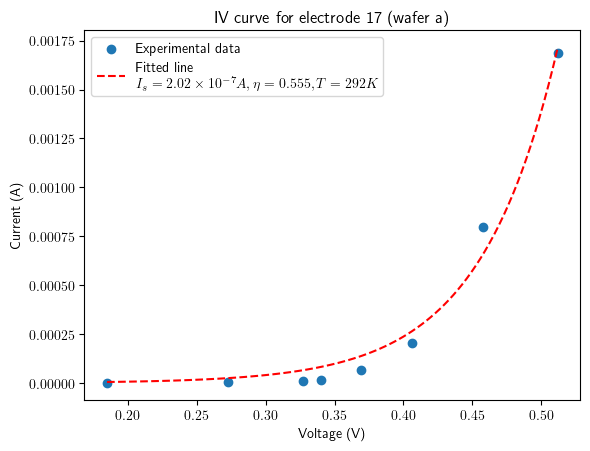

In [124]:
#direct relax with eta
I_fitted_1_eta=I_relax_with_eta(x_exp_1,I_s_fit_1_eta,eta_1)

plt.rcParams['text.usetex'] = True
#plt.figure(dpi=300)
#plt.figure(figsize=(10, 6), dpi=300)

# Convert I_s to coefficient for 10^-17
I_s_coefficient = I_s_fit_1_eta / 1e-7

# Update parameters_label to show I_s as coefficient \times 10^{-17}
parameters_label = (
    rf"$I_s={I_s_coefficient:.2f} \times 10^{{-7}} A, \eta={eta_1:.3g}, T={Temp:.3g} K$"
)

equation_label = rf"$I = I_s \left( \exp\left(\frac{{(1-\eta)Vq}}{{k_BT}}\right) - 1 \right)$"

plt.scatter(V_exp_1,I_exp_1,label="Experimental data")
#plt.plot(x_exp_1,I_fitted_1_eta,'--r',label=r"Fitted curve: $I = I_s \left( \exp\left(\frac{(1-\eta)Vq}{k_BT}\right) - 1 \right)$")
plt.plot(x_exp_1, I_fitted_1_eta, '--r', label="Fitted line" + "\n" + parameters_label) 
#plt.plot(x_exp_1, I_fitted_1_eta, '--r', label=equation_label + "\n" + parameters_label)  # Add both equation and parameters to the label


plt.title("IV curve for electrode 17 (wafer a)")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.legend(loc='best')
#plt.savefig("IV_electrode_17.png")
plt.show()
plt.close()

In [126]:
#linear
#T_1=1/a_fit_1*(charge_e/k_B)
#print(T_1-273)
#print(log_I_s_fit_1)
#print(area_1*R*T_1**2)
#print(area_1)
#print(1/a_fit_1)
#(-log_I_s+np.log(area*R*T**2))*1/a
#phi_B_1=phi_B(log_I_s_fit_1, area_1, T_1, a_fit_1)
phi_B_1=phi_B(log_I_s_fit_1, area_1, Temp)
#print("linear approach: ", phi_B_1)


#direct
#T_1_1=1/a_fit_1_1*(charge_e/k_B)
def f(phi): return I_s_fit_1-area_1*R*Temp**2*np.exp(-1*a*phi)
phi_B_1_direct=fsolve(f,0)
#print("direct approach: ", phi_B_1_direct[0])

#relax
def f(phi): return I_s_fit_relax-area_1*R*Temp**2*np.exp(-1*a*phi)
phi_B_relax=fsolve(f,0)
#print("relax: ", phi_B_relax[0])

#relax not fix a
def f(phi): return i_relax_a-area_1*R*T_test**2*np.exp(-1*a0_relax*phi)
phi_B_relax_a=fsolve(f,0)
#print("relax a: ", phi_B_relax_a[0])

#relax with eta
def f(phi): return I_s_fit_1_eta-area_1*R*Temp**2*np.exp(-1*a*phi)
phi_B_1_eta=fsolve(f,0)
print("phi_B using eta: ", phi_B_1_eta[0])


phi_B using eta:  0.7007192516509844


Data for 2nd trail

In [12]:
data=np.loadtxt('3.7wafera2nd_test.csv', delimiter=",",skiprows=1)
V_exp_2=data.T[0]
I_exp_2=data.T[1]

In [13]:
log_I_exp_2=np.log(I_exp_2)
#print(log_I_exp_2)

#linear approach
fit_result_2=opt.curve_fit(log_I_s_func,V_exp_2,log_I_exp_2) 

#direct approach
fit_result_2_direct=opt.curve_fit(I_func,V_exp_2,I_exp_2) 

#direct fit with relax eta
fit_result_2_eta=opt.curve_fit(I_relax_with_eta, V_exp_2,I_exp_2,maxfev=10000)

#plt.scatter(V_exp_2,log_I_exp_2)

In [14]:
print(fit_result_2[0]) #linear
print(fit_result_2_direct[0]) #direct
print(fit_result_2_eta[0])

[-26.02186853]
[2.74969149e-12]
[6.18948201e-08 5.19042235e-01]


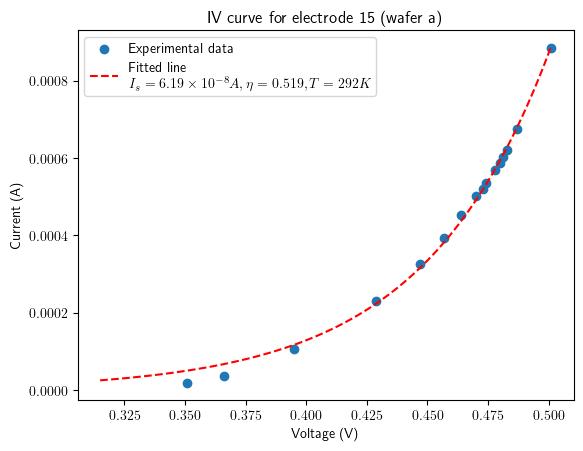

In [104]:
#linear
x_exp_2=np.linspace(0.315,0.501,100)
log_I_s_fit_2=fit_result_2[0][0]

'''
a_fit_2=fit_result_2[0][1]
log_I_fitted_2=log_I_s_fit_2+ a*x_exp_2
plt.scatter(V_exp_2,log_I_exp_2)
plt.plot(x_exp_2,log_I_fitted_2,'--r')
plt.ylim(0,0.001)
plt.show()
'''

#direct
I_s_fit_2=fit_result_2_direct[0][0]
I_fitted_2=I_s_fit_2*(np.exp(a*x_exp_2)-1)
'''
plt.scatter(V_exp_2,I_exp_2)
plt.plot(x_exp_2,I_fitted_2,'--r')
plt.show()
'''

#direct fit with relax eta
I_s_fit_2_eta=fit_result_2_eta[0][0]
eta_2=fit_result_2_eta[0][1]
I_fitted_2_eta=I_relax_with_eta(x_exp_2,I_s_fit_2_eta,eta_2)


plt.rcParams['text.usetex'] = True

#plt.figure(figsize=(10, 6), dpi=300)


'''
plt.figure(dpi=300)

plt.figure(figsize=(10, 6), dpi=300)
'''
# Convert I_s to coefficient for 10^-17
I_s_coefficient = I_s_fit_2_eta / 1e-8

# Update parameters_label to show I_s as coefficient \times 10^{-17}
parameters_label = (
    rf"$I_s={I_s_coefficient:.2f} \times 10^{{-8}} A, \eta={eta_2:.3g}, T={Temp:.3g} K$"
)

equation_label = rf"$I = I_s \left( \exp\left(\frac{{(1-\eta)Vq}}{{k_BT}}\right) - 1 \right)$"

plt.scatter(V_exp_2,I_exp_2,label="Experimental data")
plt.plot(x_exp_2, I_fitted_2_eta, '--r', label="Fitted line" + "\n" + parameters_label) 
#plt.plot(x_exp_2, I_fitted_2_eta, '--r', label=equation_label + "\n" + parameters_label)  # Add both equation and parameters to the label

plt.title("IV curve for electrode 15 (wafer a)")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.legend(loc='best')
#plt.savefig("IV_electrode_15.png")
plt.show()
plt.close()



In [16]:
#linear
phi_B_2=phi_B(log_I_s_fit_2, area_2, Temp)
#print("linear: ", phi_B_2)

#direct
def f(phi): return I_s_fit_2-area_2*R*Temp**2*np.exp(-1*a*phi)
phi_B_2_direct=fsolve(f,0)
#print("direct: ", phi_B_2_direct[0])

#relax with eta
def f(phi): return I_s_fit_2_eta-area_1*R*Temp**2*np.exp(-1*a*phi)
phi_B_2_eta=fsolve(f,0)
print("relax eta: ", phi_B_2_eta[0])


relax eta:  0.7305240458960481


Data for 3rd trail

In [18]:
data=np.loadtxt('3.7wafera3rd_test.csv', delimiter=",",skiprows=1)
V_exp_3=data.T[0]
I_exp_3=data.T[1]

#linear approach
log_I_exp_3=np.log(I_exp_3)
fit_result_3=opt.curve_fit(log_I_s_func,V_exp_3,log_I_exp_3)

#direct approach
fit_result_3_direct = opt.curve_fit(I_func, V_exp_3, I_exp_3) # p0=[1e-6, 10]

#direct fit with relax eta
fit_result_3_eta=opt.curve_fit(I_relax_with_eta, V_exp_3,I_exp_3, p0=[1e-13,0],maxfev=10000)


print(fit_result_3[0]) #linear
print(fit_result_3_direct[0]) #direct
print(fit_result_3_eta[0]) #direct with eta

[-25.91497024]
[8.74634787e-13]
[3.66092508e-08 5.28829075e-01]


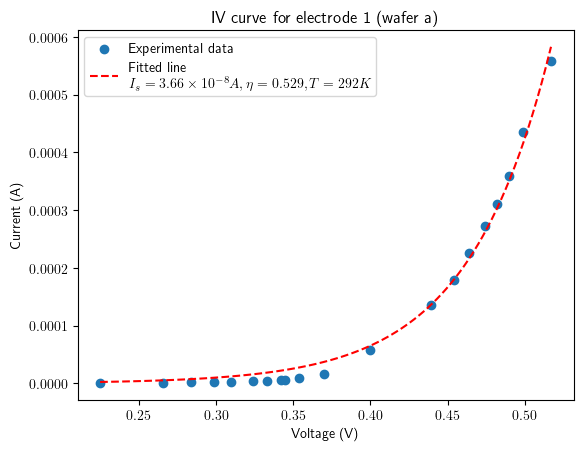

In [108]:
#linear
x_exp_3=np.linspace(0.225,0.517,100)
log_I_s_fit_3=fit_result_3[0][0]

'''
a_fit_3=fit_result_3[0][1]
log_I_fitted_3=log_I_s_fit_3+ a*V_exp_3
plt.scatter(V_exp_3,log_I_exp_3)
plt.plot(V_exp_3,log_I_fitted_3,'--r')
plt.ylim(0,0.001)
plt.show()
'''


#direct
I_s_fit_3_direct=fit_result_3_direct[0][0]
I_fitted_3_direct=I_s_fit_3_direct*np.exp(a*x_exp_3)-I_s_fit_3_direct
'''
plt.scatter(V_exp_3,I_exp_3)
plt.plot(x_exp_3,I_fitted_3_direct,'--r')
plt.show()
'''

#direct fit with relax eta
I_s_fit_3_eta=fit_result_3_eta[0][0]
eta_3=fit_result_3_eta[0][1]
I_fitted_3_eta=I_relax_with_eta(x_exp_3,I_s_fit_3_eta,eta_3)

#plot
plt.rcParams['text.usetex'] = True
#plt.figure(figsize=(10, 6), dpi=300)


'''
plt.figure(dpi=300)
'''
#plt.figure(figsize=(10, 6), dpi=300)

# Convert I_s to coefficient for 10^-17
I_s_coefficient = I_s_fit_3_eta / 1e-8

# Update parameters_label to show I_s as coefficient \times 10^{-17}
parameters_label = (
    rf"$I_s={I_s_coefficient:.2f} \times 10^{{-8}} A, \eta={eta_3:.3g}, T={Temp:.3g} K$"
)

equation_label = rf"$I = I_s \left( \exp\left(\frac{{(1-\eta)Vq}}{{k_BT}}\right) - 1 \right)$"

plt.scatter(V_exp_3,I_exp_3,label="Experimental data")
plt.plot(x_exp_3, I_fitted_3_eta, '--r', label="Fitted line" + "\n" + parameters_label) 
#plt.plot(x_exp_3, I_fitted_3_eta, '--r', label=equation_label + "\n" + parameters_label)  # Add both equation and parameters to the label

plt.title("IV curve for electrode 1 (wafer a)")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.legend(loc='best')
#plt.savefig("IV_electrode_1.png")
plt.show()
plt.close()


In [20]:
#linear
phi_B_3=phi_B(log_I_s_fit_3, area_3, Temp)
#print("linear: ", phi_B_3)

#direct
def f(phi): return I_s_fit_3_direct-area_3*R*Temp**2*np.exp(-1*a*phi)
phi_B_3_direct=fsolve(f,0,xtol=1e-10)
#print("direct: ", phi_B_3_direct[0])

#direct with eta
def f(phi): return I_s_fit_3_eta-area_3*R*Temp**2*np.exp(-1*a*phi)
phi_B_3_eta=fsolve(f,0,xtol=1e-10)
print("direct with eta: ", phi_B_3_eta[0])



direct with eta:  0.7146601064452316


Data for 4th trail

In [22]:
data=np.loadtxt('3.7wafera4th_test.csv', delimiter=",",skiprows=1)
#data=np.loadtxt('3.7wafera2nd_test.csv', delimiter=",")
V_exp_4=data.T[0]
I_exp_4=data.T[1]

log_I_exp_4=np.log(I_exp_4)
#print(log_I_exp_4)
fit_result_4=opt.curve_fit(log_I_s_func,V_exp_4,log_I_exp_4) #linear approach
fit_result_4_direct=opt.curve_fit(I_func,V_exp_4,I_exp_4) #direct approach

#direct fit with relax eta
fit_result_4_eta=opt.curve_fit(I_relax_with_eta, V_exp_4,I_exp_4, p0=[1e-13,0],maxfev=10000)

print(fit_result_4[0]) #linear
print(fit_result_4_direct[0]) #direct
print(fit_result_4_eta[0]) #direct with eta

[-26.04692787]
[1.12767895e-12]
[1.92619521e-08 4.92107645e-01]


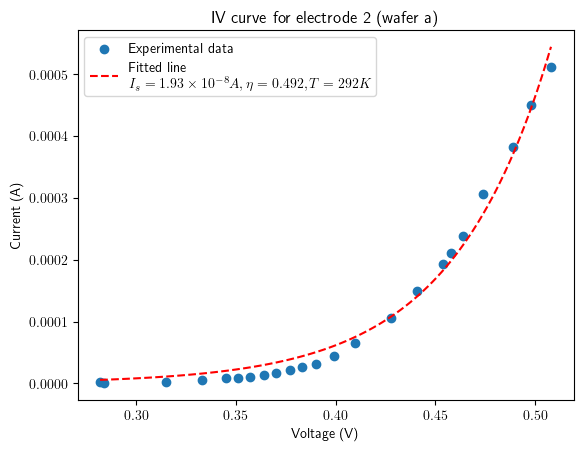

In [112]:
#linear
x_exp_4=np.linspace(0.282,0.508,100)
log_I_s_fit_4=fit_result_4[0][0]
log_I_fitted_4=log_I_s_fit_4+ a*x_exp_4
'''
plt.scatter(V_exp_4,log_I_exp_4)
plt.plot(x_exp_4,log_I_fitted_4,'--r')
plt.ylim(0,0.001)
plt.show()
'''

#direct
I_s_fit_4=fit_result_4_direct[0][0]
I_fitted_4=I_s_fit_4*(np.exp(a*x_exp_4)-1)
'''
plt.scatter(V_exp_4,I_exp_4)
plt.plot(x_exp_4,I_fitted_4,'--r')
plt.show()
'''

#direct with eta
I_s_fit_4_eta=fit_result_4_eta[0][0]
eta_4=fit_result_4_eta[0][1]
I_fitted_4_eta=I_relax_with_eta(x_exp_4,I_s_fit_4_eta,eta_4)


#plot
plt.rcParams['text.usetex'] = True
'''
plt.figure(dpi=300)
'''
#plt.figure(figsize=(10, 6), dpi=300)

# Convert I_s to coefficient for 10^-17
I_s_coefficient = I_s_fit_4_eta / 1e-8

# Update parameters_label to show I_s as coefficient \times 10^{-17}
parameters_label = (
    rf"$I_s={I_s_coefficient:.2f} \times 10^{{-8}} A, \eta={eta_4:.3g}, T={Temp:.3g} K$"
)

equation_label = rf"$I = I_s \left( \exp\left(\frac{{(1-\eta)Vq}}{{k_BT}}\right) - 1 \right)$"

plt.scatter(V_exp_4,I_exp_4,label="Experimental data")
plt.plot(x_exp_4, I_fitted_4_eta, '--r', label="Fitted line" + "\n" + parameters_label) 
#plt.plot(x_exp_4, I_fitted_4_eta, '--r', label=equation_label + "\n" + parameters_label)  # Add both equation and parameters to the label

plt.title("IV curve for electrode 2 (wafer a)")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.legend(loc='best')
#plt.savefig("IV_electrode_2.png")
plt.show()
plt.close()


In [24]:
#linear
phi_B_4=phi_B(log_I_s_fit_4, area_4, Temp)
#print("linear: ",phi_B_4)

#direct
def f(phi): return I_s_fit_4-area_4*R*Temp**2*np.exp(-1*a*phi)
phi_B_4_direct=fsolve(f,0)
#print("direct: ", phi_B_4_1[0])

#direct with eta
def f(phi): return I_s_fit_4_eta-area_4*R*Temp**2*np.exp(-1*a*phi)
phi_B_4_eta=fsolve(f,0)
print("direct with eta: ", phi_B_4_eta[0])

direct with eta:  0.7244944381972502


Data for 5th trail

In [26]:
data=np.loadtxt('3.7wafera5th_test.csv', delimiter=",",skiprows=1)
V_exp_5=data.T[0]
I_exp_5=data.T[1]

log_I_exp_5=np.log(I_exp_5)
#print(log_I_exp_5)
fit_result_5=opt.curve_fit(log_I_s_func,V_exp_5,log_I_exp_5) #linear approach
fit_result_5_direct=opt.curve_fit(I_func,V_exp_5,I_exp_5) #direct

#direct fit with relax eta
fit_result_5_eta=opt.curve_fit(I_relax_with_eta, V_exp_5,I_exp_5, p0=[1e-13,0],maxfev=10000)
print(fit_result_5[0]) #linear
print(fit_result_5_direct[0]) #direct
print(fit_result_5_eta[0]) #direct with eta

[-25.03754873]
[2.99332809e-12]
[1.07416839e-07 5.37810126e-01]


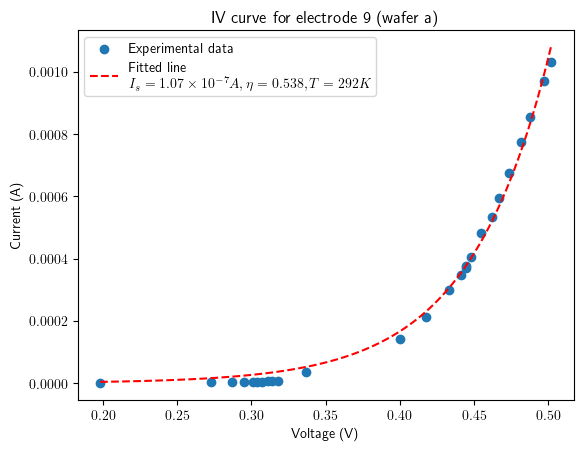

In [116]:
#linear
x_exp_5=np.linspace(0.198,0.502,100)
log_I_s_fit_5=fit_result_5[0][0]
'''
a_fit_5=fit_result_5[0][1]
log_I_fitted_5=log_I_s_fit_5 + a*x_exp_5
plt.scatter(V_exp_5,log_I_exp_5)
plt.plot(x_exp_5,log_I_fitted_5,'--r')
plt.ylim(0,0.001)
plt.show()
'''

#direct
I_s_fit_5=fit_result_5_direct[0][0]
I_fitted_5=I_s_fit_5*(np.exp(a*x_exp_5)-1)
'''
plt.scatter(V_exp_5,I_exp_5)
plt.plot(x_exp_5,I_fitted_5,'--r')
plt.show()
'''

#direct with eta
I_s_fit_5_eta=fit_result_5_eta[0][0]
eta_5=fit_result_5_eta[0][1]
I_fitted_5_eta=I_relax_with_eta(x_exp_5,I_s_fit_5_eta,eta_5)

#plot
plt.rcParams['text.usetex'] = True
'''
plt.figure(dpi=300)
'''
#plt.figure(figsize=(10, 6), dpi=300)

# Convert I_s to coefficient for 10^-17
I_s_coefficient = I_s_fit_5_eta / 1e-7

# Update parameters_label to show I_s as coefficient \times 10^{-17}
parameters_label = (
    rf"$I_s={I_s_coefficient:.2f} \times 10^{{-7}} A, \eta={eta_5:.3g}, T={Temp:.3g} K$"
)

equation_label = rf"$I = I_s \left( \exp\left(\frac{{(1-\eta)Vq}}{{k_BT}}\right) - 1 \right)$"

plt.scatter(V_exp_5,I_exp_5,label="Experimental data")
plt.plot(x_exp_5, I_fitted_5_eta, '--r', label="Fitted line" + "\n" + parameters_label) 
#plt.plot(x_exp_5, I_fitted_5_eta, '--r', label=equation_label + "\n" + parameters_label)  # Add both equation and parameters to the label

plt.title("IV curve for electrode 9 (wafer a)")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.legend(loc='best')
#plt.savefig("IV_electrode_9.png")
plt.show()
plt.close()


In [28]:
#linear
phi_B_5=phi_B(log_I_s_fit_5, area_5, Temp)
#print("linear: ",phi_B_5)

#direct
def f(phi): return I_s_fit_5-area_5*R*Temp**2*np.exp(-1*a*phi)
phi_B_5_direct=fsolve(f,0)
#print("direct: ", phi_B_5_direct[0])

#direct with eta
def f(phi): return I_s_fit_5_eta-area_4*R*Temp**2*np.exp(-1*a*phi)
phi_B_5_eta=fsolve(f,0)
print("direct with eta: ", phi_B_5_eta[0])

direct with eta:  0.6812281290397832


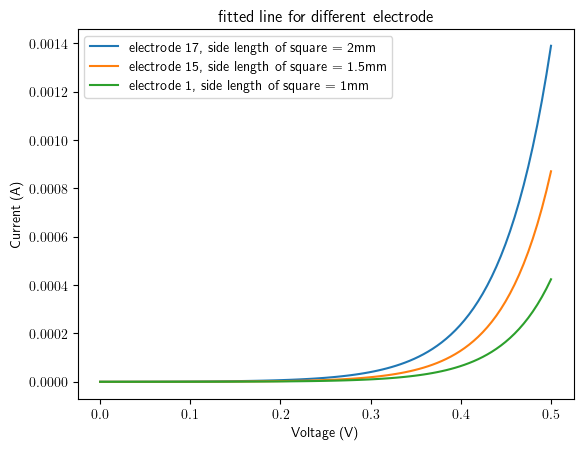

In [120]:
x_plot=np.linspace(0,0.5,100)
I_plot_1_eta=I_relax_with_eta(x_plot,I_s_fit_1_eta,eta_1)
I_plot_2_eta=I_relax_with_eta(x_plot,I_s_fit_2_eta,eta_2)
I_plot_3_eta=I_relax_with_eta(x_plot,I_s_fit_3_eta,eta_3)
'''
I_plot_4_eta=I_relax_with_eta(x_plot,I_s_fit_4_eta,eta_4)
I_plot_5_eta=I_relax_with_eta(x_plot,I_s_fit_5_eta,eta_5)
'''



#plt.figure(figsize=(10, 6), dpi=300)
plt.plot(x_plot,I_plot_1_eta,label="electrode 17, side length of square = 2mm")
plt.plot(x_plot,I_plot_2_eta,label="electrode 15, side length of square = 1.5mm")
plt.plot(x_plot,I_plot_3_eta,label="electrode 1, side length of square = 1mm")
plt.title("fitted line for different electrode")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.legend(loc='best')
#plt.plot(x_plot,I_plot_4_eta,label='4')
#plt.plot(x_plot,I_plot_5_eta,label='5')
#plt.savefig("fitted_line_for_different_electrode.png")
plt.show()
plt.close()



In [30]:
#theoretical phi_B
phi_B_the_up=0.73
phi_B_the_low=0.6

percentage_diff_1_up=(phi_B_1_eta[0]-phi_B_the_up)/phi_B_the_up
percentage_diff_2_up=(phi_B_2_eta[0]-phi_B_the_up)/phi_B_the_up
percentage_diff_3_up=(phi_B_3_eta[0]-phi_B_the_up)/phi_B_the_up
percentage_diff_4_up=(phi_B_4_eta[0]-phi_B_the_up)/phi_B_the_up
percentage_diff_5_up=(phi_B_5_eta[0]-phi_B_the_up)/phi_B_the_up

percentage_diff_1_low=(phi_B_1_eta[0]-phi_B_the_low)/phi_B_the_low
percentage_diff_2_low=(phi_B_2_eta[0]-phi_B_the_low)/phi_B_the_low
percentage_diff_3_low=(phi_B_3_eta[0]-phi_B_the_low)/phi_B_the_low
percentage_diff_4_low=(phi_B_4_eta[0]-phi_B_the_low)/phi_B_the_low
percentage_diff_5_low=(phi_B_5_eta[0]-phi_B_the_low)/phi_B_the_low

avg_diff_up=(percentage_diff_1_up+percentage_diff_2_up+percentage_diff_3_up+percentage_diff_4_up+percentage_diff_5_up)/5
avg_diff_low=(percentage_diff_1_low+percentage_diff_2_low+percentage_diff_3_low+percentage_diff_4_low+percentage_diff_5_low)/5

average_phi_B=(phi_B_1_eta[0]+phi_B_2_eta[0]+phi_B_3_eta[0]+phi_B_4_eta[0]+phi_B_5_eta[0])/5

avg_phi_B_diff_up=(average_phi_B-phi_B_the_up)/phi_B_the_up
avg_phi_B_diff_low=(average_phi_B-phi_B_the_low)/phi_B_the_low

print("average phi_B: ", average_phi_B)

print("percentage difference 1 up: ", percentage_diff_1_up)
print("percentage difference 2 up: ", percentage_diff_2_up)
print("percentage difference 3 up: ", percentage_diff_3_up)
print("percentage difference 4 up: ", percentage_diff_4_up)
print("percentage difference 5 up: ", percentage_diff_5_up)
print("average percentage diff up: ", avg_diff_up)
print("average phi_B percentage diff up: ", avg_phi_B_diff_up)
print("\n")
print("percentage difference 1 low: ", percentage_diff_1_low)
print("percentage difference 2 low: ", percentage_diff_2_low)
print("percentage difference 3 low: ", percentage_diff_3_low)
print("percentage difference 4 low: ", percentage_diff_4_low)
print("percentage difference 5 low: ", percentage_diff_5_low)
print("average percentage diff low: ", avg_diff_low)
print("average phi_B percentage diff low: ", avg_phi_B_diff_low)

average phi_B:  0.7103251942458595
percentage difference 1 up:  -0.04011061417673372
percentage difference 2 up:  0.0007178710904769221
percentage difference 3 up:  -0.021013552814751223
percentage difference 4 up:  -0.007541865483218833
percentage difference 5 up:  -0.0668107821372832
average percentage diff up:  -0.02695178870430201
average phi_B percentage diff up:  -0.02695178870430204


percentage difference 1 low:  0.16786541941830732
percentage difference 2 low:  0.21754007649341361
percentage difference 3 low:  0.19110017740871937
percentage difference 4 low:  0.20749073032875043
percentage difference 5 low:  0.13538021506630546
average percentage diff low:  0.18387532374309926
average phi_B percentage diff low:  0.1838753237430992


barrier vs area

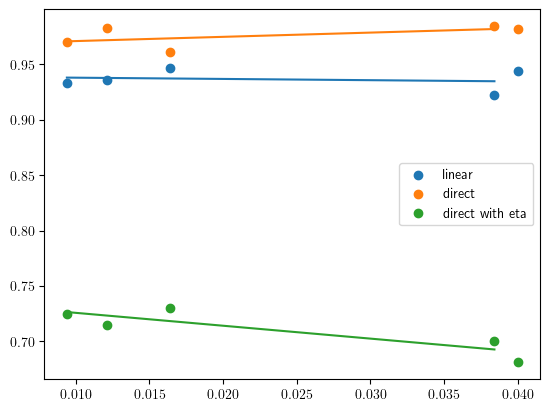

<function matplotlib.pyplot.show(close=None, block=None)>

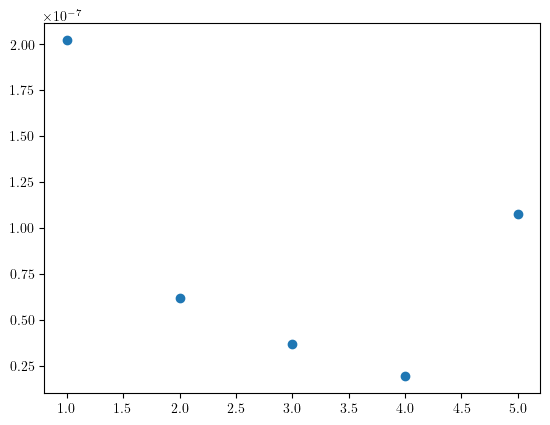

In [32]:
area=[area_1,area_2,area_3,area_4,area_5]
barrier_linear=[phi_B_1,phi_B_2,phi_B_3,phi_B_4,phi_B_5]
barrier_direct=[phi_B_1_direct[0],phi_B_2_direct[0],phi_B_3_direct[0],phi_B_4_direct[0],phi_B_5_direct[0]]
barrier_direct_eta=[phi_B_1_eta[0],phi_B_2_eta[0],phi_B_3_eta[0],phi_B_4_eta[0],phi_B_5_eta[0]]
def fit(x,m,c): return m*x+c

test=opt.curve_fit(fit,area,barrier_linear)
x_test=np.linspace(area_1,area_4,100)
m_fit=test[0][0]
c_fit=test[0][1]
fit_test=m_fit*x_test+c_fit

test_direct=opt.curve_fit(fit,area,barrier_direct)
m_fit_direct=test_direct[0][0]
c_fit_direct=test_direct[0][1]
fit_test_direct=m_fit_direct*x_test+c_fit_direct

test_eta=opt.curve_fit(fit,area,barrier_direct_eta)
m_fit_eta=test_eta[0][0]
c_fit_eta=test_eta[0][1]
fit_test_eta=m_fit_eta*x_test+c_fit_eta


plt.scatter(area,barrier_linear, label='linear')
plt.plot(x_test,fit_test)
plt.scatter(area,barrier_direct, label='direct')
plt.plot(x_test,fit_test_direct)
plt.scatter(area,barrier_direct_eta, label='direct with eta')
plt.plot(x_test,fit_test_eta)
plt.legend(loc='best')
plt.show()

I_s_eta_all=[I_s_fit_1_eta,I_s_fit_2_eta,I_s_fit_3_eta,I_s_fit_4_eta,I_s_fit_5_eta]
num=[1,2,3,4,5]

plt.scatter(num,I_s_eta_all)
plt.show